# Learning and Decision Making

## Laboratory 1: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the train modeling problem described in the Homework and for which you wrote a Markov chain model:

<img src="trains.png" width="400px">

Recall that your chain should describe the motion of the single train traveling the network, where: 

* Stations $A$ and $B$ are just like regular stops;
* The travel time between any two consecutive stops is exactly 10 minutes. The train stops exactly 2 minutes in each location.
* At the intersection marked with a bold $\times$, the train follows the branch 1-3 with probability 0.5, the branch 4 with probability 0.15, and the branch 5-6 with probability 0.35.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`. If you need additional matrix operations (such as matrix powers or eigenvalues and eigenvectors), you may also import the library `numpy.linalg`.

**Note 2**: Make sure to print the result in the end.

---

In [6]:
# -- Insert your code here -- #
import numpy as np

# State Space
# Station A, Stations 1 - 6, Station B

X = ['A', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'B']

#Markov Transition Probabilities

P = np.array([
    [0, 0.5, 0, 0, 0.15, 0.35, 0, 0],
    [0, 0  , 1, 0, 0   , 0   , 0, 0],
    [0, 0  , 0, 1, 0   , 0   , 0, 0],
    [0, 0  , 0, 0, 0   , 0   , 0, 1],
    [0, 0  , 0, 0, 0   , 0   , 0, 1],
    [0, 0  , 0, 0, 0   , 0   , 1, 0],
    [0, 0  , 0, 0, 0   , 0   , 0, 1],
    [1, 0  , 0, 0, 0   , 0   , 0, 0],
])
print('X = ',X,  '\n')
print("P =\n" , P, "\n")

X =  ['A', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'B'] 

P =
 [[0.   0.5  0.   0.   0.15 0.35 0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.  ]] 



---

#### Activity 2.

Compute, using the proper transition matrix manipulations, the probability of the following trajectories:

* 4 - $B$ - $A$ - 4
* $A$ - 2 - 3 - $B$ - $A$
* 5 - 6 - $B$ - $A$ - 4

**Note:** Make sure to print the result in the end.

---

In [10]:
# -- Insert your code here -- #
#P[B|S4]*P[A|B]*P[S4|A]
print(P[4,7]*P[7,0]*P[0,4])

#P[S2|A]*P[S3|S2]*P[B|S3]*P[A|B]
print(P[0,2]*P[2,3]*P[3,7]*P[7,0])

#P[6|5]*P[B|6]*P[A|B]*P[4|A]
print(P[5,6]*P[6,7]*P[7,0]*P[0,4])

0.15
0.0
0.15


### 2. Stability

---

#### Activity 3

Compute the stationary distribution for the chain. Confirm, computationally, that it is indeed the stationary distribution.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [13]:
# -- Insert your code here -- #

w,vector = np.linalg.eig(P.T)
norma = np.linalg.norm(vector[:0])
normvector=np.real(vector[:,0]/vector[:,0].sum())
print(normvector)

print("\n")
print(sum(normvector))
print("\n")

def normalizeVector(vector):
    normvector=np.real(vector[:,0]/vector[:,0].sum())
    return normvector
print(np.matmul(normvector,P))
print("\n")

print("This is a stationary matrix since u = uP. In this case, normvector = normvector * P")

[0.22988506 0.11494253 0.11494253 0.11494253 0.03448276 0.08045977
 0.08045977 0.22988506]


1.0


[0.22988506 0.11494253 0.11494253 0.11494253 0.03448276 0.08045977
 0.08045977 0.22988506]


This is a stationary matrix since u = uP. In this case, normvector = normvector * P


---

#### Activity 4.

Empirically show that the chain is ergodic.

**Note:** Recall that a chain is ergodic if, given any initial distribution, it converges to the stationary distribution.

---

In [17]:
# -- Insert your code here -- #

The chain is irreducible since any state can be reached from any state.

The chain is aperiodic since 

The chain is ergodic since it is aperiodic and irreducible.

SyntaxError: invalid syntax (<ipython-input-17-1c5ba5f32929>, line 3)

### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [14]:
# -- Insert your code here -- #
from random import randint

trajectory = np.zeros( (10000, 1), dtype=np.int8)
state = 0

for i in range (0, 10000):
    state = np.random.choice(8, p=P[state])
    trajectory[i]=state
    
print(trajectory)

[[5]
 [6]
 [7]
 ...
 [6]
 [7]
 [0]]


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #3.

**Note**: Don't forget to load `matplotlib`.

---

/home/masihi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


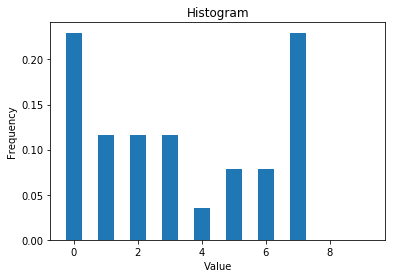

In [16]:
# -- Insert your code here -- #
import numpy as np
import matplotlib.pyplot as plt


plt.hist(trajectory, bins=10, normed=1, rwidth=0.5, range=[-0.5, 9.5])
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()